<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/paphos_summer_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

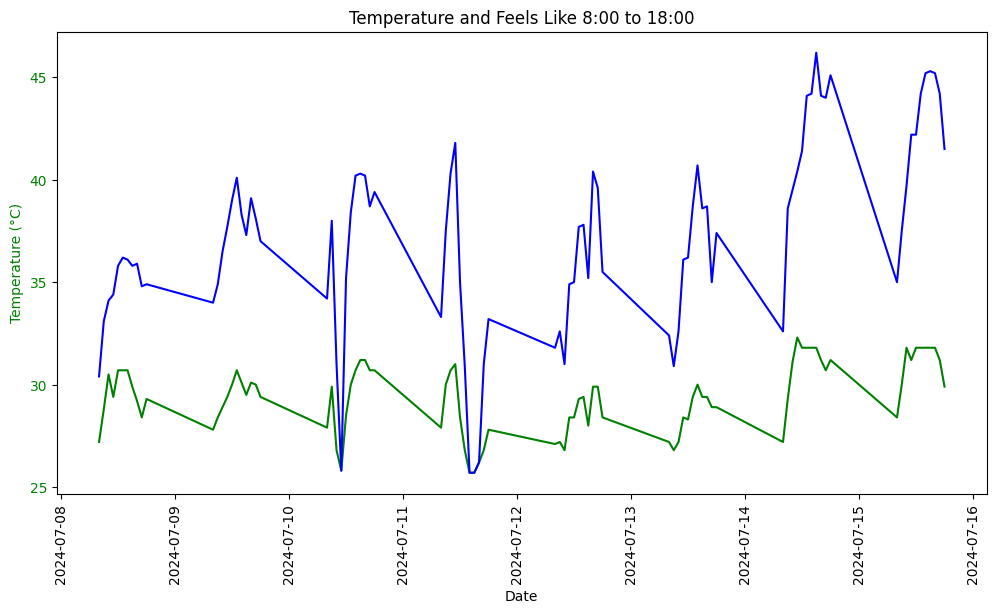

In [46]:
import pandas as pd
import matplotlib.pyplot as plt



# Read data from CSV files
df = pd.read_csv('https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/stats/paphos.csv',
                 parse_dates=['datetime'], index_col='datetime')



df=df.between_time('08:00', '18:00')


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature
ax1.plot(df.index, df['temp'], 'g', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='g')
ax1.tick_params(axis='y', labelcolor='g')


ax1.plot(df.index, df['feelslike'], 'b', label='Feels Lile')



# Rotate x-ticks
plt.xticks(rotation=90)

# Add title
plt.title('Temperature and Feels Like 8:00 to 18:00')

# Show plot
plt.show()


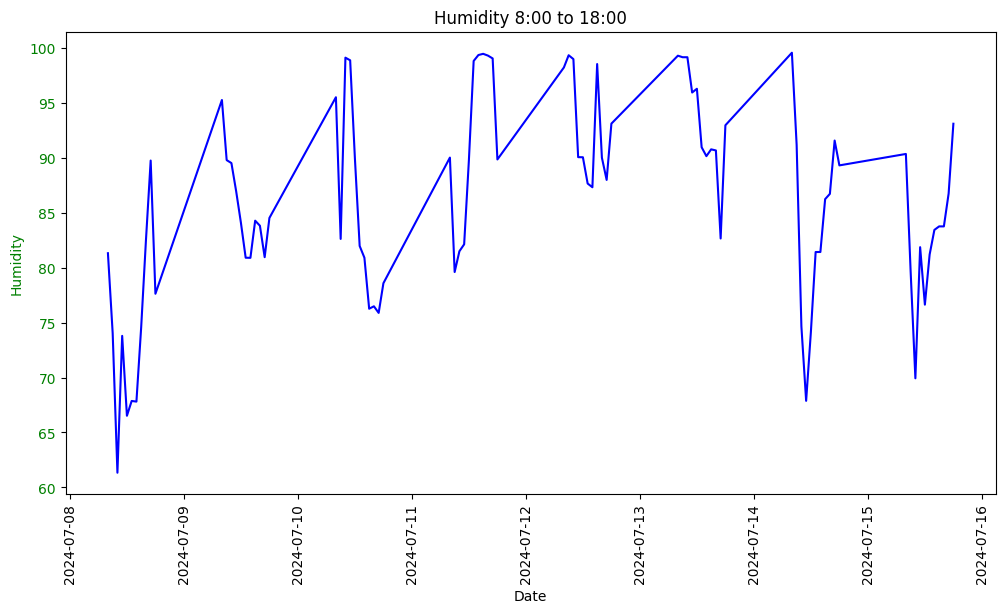

In [47]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature
ax1.plot(df.index, df['humidity'], 'b', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity', color='g')
ax1.tick_params(axis='y', labelcolor='g')



# Rotate x-ticks
plt.xticks(rotation=90)

# Add title
plt.title('Humidity 8:00 to 18:00')

# Show plot
plt.show()

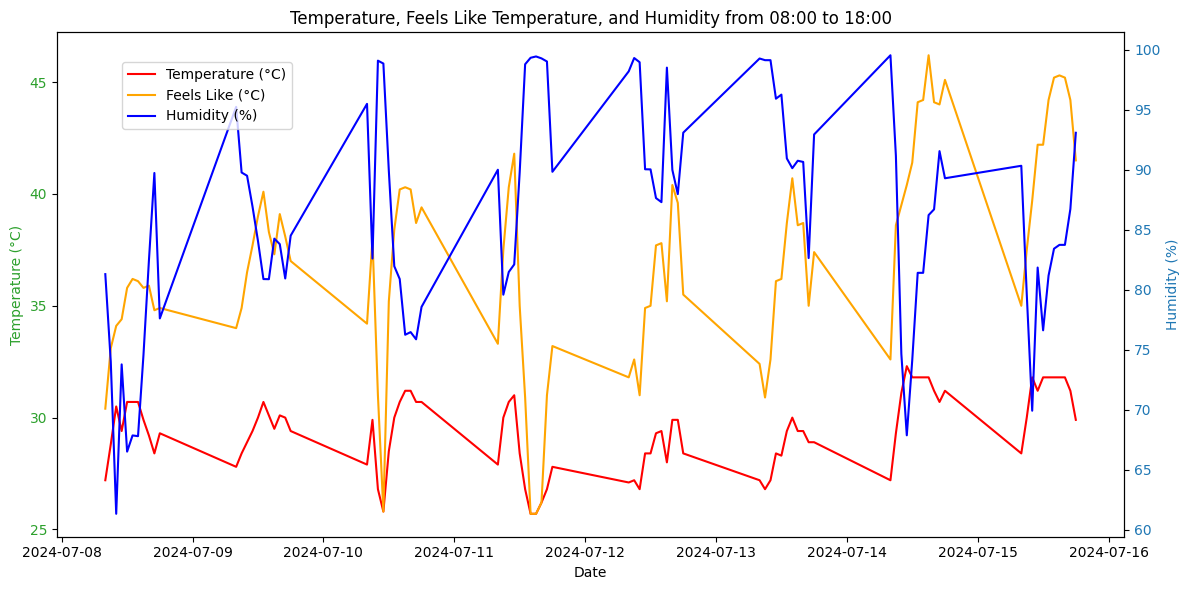

In [48]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))



# Plot temperature and feels like temperature on primary Y-axis without markers
ax1.plot(df.index, df['temp'], 'r', label='Temperature (°C)')
ax1.plot(df.index, df['feelslike'], 'orange', label='Feels Like (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Creating secondary Y-axis for Humidity without markers
ax2 = ax1.twinx()
ax2.plot(df.index, df['humidity'], 'b', label='Humidity (%)')
ax2.set_ylabel('Humidity (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adding a title
plt.title('Temperature, Feels Like Temperature, and Humidity from 08:00 to 18:00')

# Rotate x-ticks
plt.xticks(rotation=90)

# Adding legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Displaying the chart
plt.tight_layout()
plt.show()

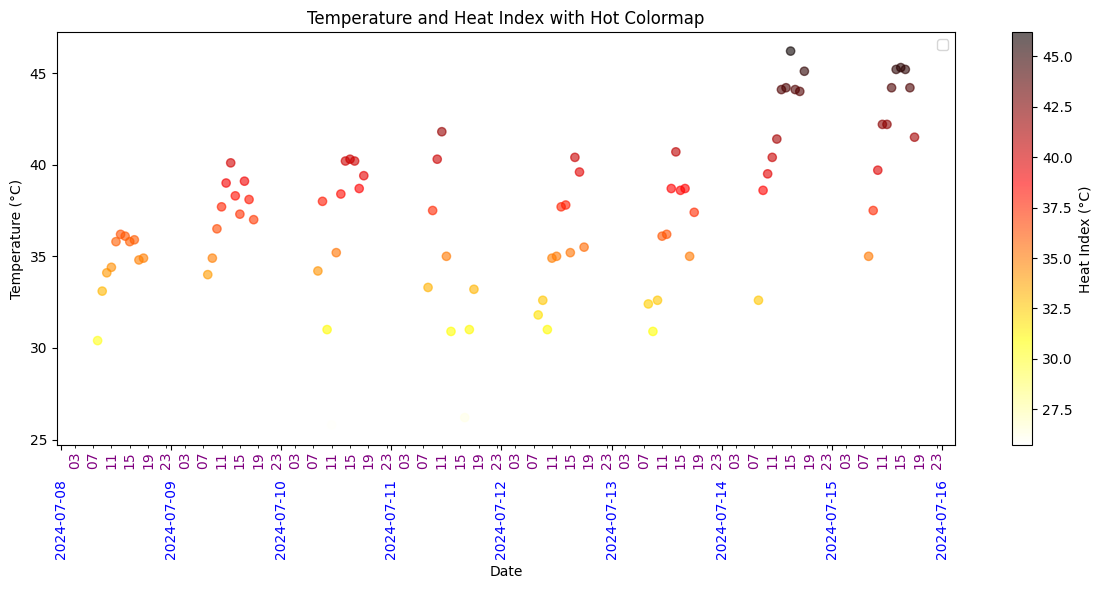

In [49]:
import matplotlib.dates as mdates


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['feelslike'], c=df['feelslike'],cmap=plt.cm.hot_r,  alpha=0.6)

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index (°C)')

# Set labels
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
plt.xticks(rotation=90)

# Set major and minor ticks format
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))

# Rotate x-ticks
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, color='purple', ha='center', va='bottom')

# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)

ax.tick_params(axis='x', which='major', pad=15)


# Adding a title
plt.title('Temperature and Heat Index with Hot Colormap')

# Adding legends
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

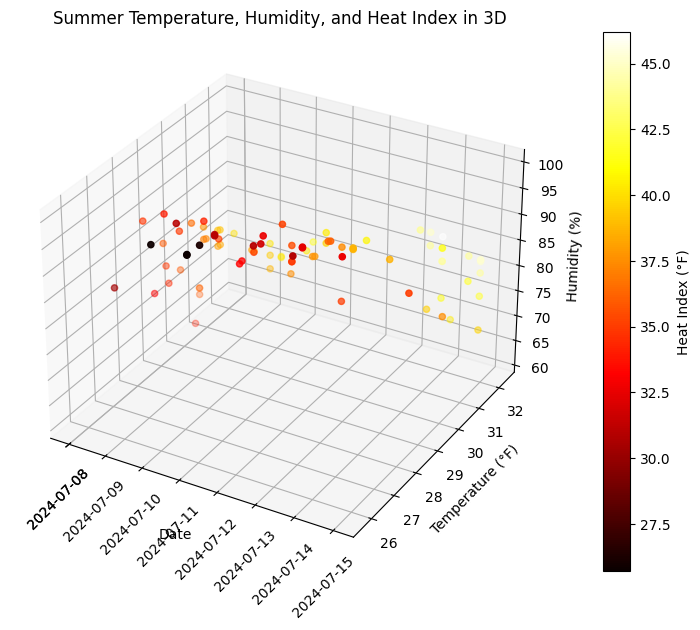

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# Plotting
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

# Convert dates to numerical values
dates_num = pd.to_datetime(df.index).map(pd.Timestamp.toordinal)

# Plot data points
sc = ax.scatter(dates_num, df['temp'], df['humidity'], c=df['feelslike'], cmap='hot')

# Color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index (°F)')

# Set labels
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°F)')
ax.set_zlabel('Humidity (%)')

# Set date labels
date_labels = df.index.strftime('%Y-%m-%d')
ax.set_xticks(dates_num[::10])
ax.set_xticklabels(date_labels[::10], rotation=45)

plt.title('Summer Temperature, Humidity, and Heat Index in 3D')
plt.show()

In [51]:
df

,name,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2024-07-08 08:00:00,myrtle beach,27.2,30.4,23.7,81.31,0.000,0,NaN,0,0,...,1017.7,50.5,16.0,220,0.8,2,30,Partially cloudy,partly-cloudy-day,"74791593718,72061300204,74791013717,KMYR,KCRE,..."
2024-07-08 09:00:00,myrtle beach,28.8,33.1,23.7,74.04,0.000,0,NaN,0,0,...,1018.0,2.5,16.0,481,1.7,5,30,Clear,clear-day,"74791593718,72061300204,74791013717,KMYR,KCRE,..."
2024-07-08 10:00:00,myrtle beach,30.5,34.1,22.2,61.34,0.000,0,NaN,0,0,...,1017.9,0.0,16.0,744,2.7,7,30,Clear,clear-day,"74791593718,72061300204,74791013717,KMYR,KCRE,..."
2024-07-08 11:00:00,myrtle beach,29.4,34.4,24.2,73.79,0.000,0,NaN,0,0,...,1018.3,3.2,16.0,921,3.3,9,30,Clear,clear-day,"74791593718,72061300204,74791013717,KMYR,KCRE,..."
2024-07-08 12:00:00,myrtle beach,30.7,35.8,23.7,66.52,0.000,0,NaN,0,0,...,1018.2,0.0,16.0,559,2.0,6,30,Clear,clear-day,"74791593718,72061300204,74791013717,KMYR,KCRE,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15 14:00:00,myrtle beach,31.8,45.2,28.7,83.43,0.000,0,NaN,0,0,...,1016.5,0.7,16.0,893,3.2,9,100,Clear,clear-day,"KMAO,KMYR,KCRE,KGGE,C0637"
2024-07-15 15:00:00,myrtle beach,31.8,45.3,28.7,83.75,0.000,0,NaN,0,0,...,1015.7,12.8,16.0,812,2.9,8,100,Clear,clear-day,"KMAO,KMYR,KCRE,KGGE,C0637"
2024-07-15 16:00:00,myrtle beach,31.8,45.2,28.7,83.75,0.023,100,rain,0,0,...,1014.7,0.0,16.0,698,2.5,7,100,Rain,rain,"KMAO,KMYR,KCRE,KGGE,C0637"
